Mount Google Drive and Set Up

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set your dataset path
dataset_path = '/content/drive/MyDrive/animals'
categories = ['cat', 'dog', 'panda']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load, Resize, Grayscale, and Label Images

In [4]:
data = []

for label, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_name in tqdm(os.listdir(category_path), desc=f"Loading {category}"):
        try:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (70, 70))
            data.append([img, label])
        except:
            continue

print(f"Total images loaded: {len(data)}")

Loading panda: 100%|██████████| 100/100 [00:02<00:00, 39.98it/s]

Total images loaded: 300


 Visualize a modified Sample

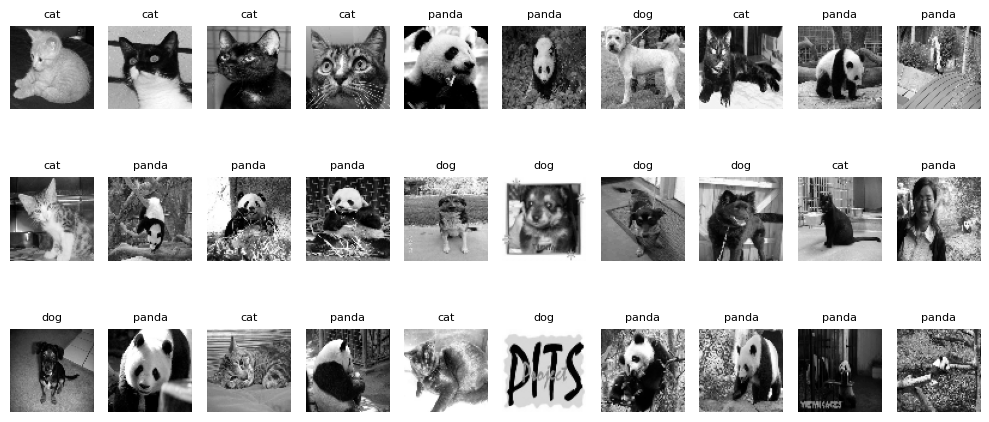

In [5]:
plt.figure(figsize=(10, 5))
random.shuffle(data)

for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(data[i][0], cmap='gray')
    plt.title(categories[data[i][1]], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

Create 5 Manual Folds

In [6]:
random.shuffle(data)
folds = []
fold_size = len(data) // 5

for i in range(5):
    start = i * fold_size
    end = (i + 1) * fold_size if i != 4 else len(data)
    folds.append(data[start:end])

for i, fold in enumerate(folds):
    print(f"Fold {i+1}: {len(fold)} images")

Fold 1: 60 images
Fold 2: 60 images
Fold 3: 60 images
Fold 4: 60 images
Fold 5: 60 images


Define L2 Distance and KNN Logic

In [7]:
def calc_l2_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def knn_predict(train_set, test_img, k):
    distances = [(calc_l2_distance(test_img, train_img), label) for train_img, label in train_set]
    distances.sort(key=lambda x: x[0])
    top_k_labels = [label for _, label in distances[:k]]
    return max(set(top_k_labels), key=top_k_labels.count)

Evaluate KNN for All Folds and K Values

In [8]:
k_values = list(range(1, 21))
fold_accuracies = {k: [] for k in k_values}

for fold_index in range(5):
    print(f"\nEvaluating Fold {fold_index + 1}")
    validation = folds[fold_index]
    training = [img for i, fold in enumerate(folds) if i != fold_index for img in fold]

    for k in k_values:
        correct = 0
        for test_img, true_label in tqdm(validation, desc=f"K={k}"):
            pred_label = knn_predict(training, test_img, k)
            if pred_label == true_label:
                correct += 1
        accuracy = correct / len(validation)
        fold_accuracies[k].append(accuracy)
        print(f"K={k} → Accuracy: {accuracy:.2f}")


Evaluating Fold 1


K=1: 100%|██████████| 60/60 [00:00<00:00, 279.28it/s]


K=1 → Accuracy: 0.42


K=2: 100%|██████████| 60/60 [00:00<00:00, 268.97it/s]


K=2 → Accuracy: 0.33


K=3: 100%|██████████| 60/60 [00:00<00:00, 273.73it/s]


K=3 → Accuracy: 0.43


K=4: 100%|██████████| 60/60 [00:00<00:00, 233.11it/s]


K=4 → Accuracy: 0.30


K=5: 100%|██████████| 60/60 [00:00<00:00, 266.84it/s]


K=5 → Accuracy: 0.40


K=6: 100%|██████████| 60/60 [00:00<00:00, 261.07it/s]


K=6 → Accuracy: 0.45


K=7: 100%|██████████| 60/60 [00:00<00:00, 247.89it/s]


K=7 → Accuracy: 0.37


K=8: 100%|██████████| 60/60 [00:00<00:00, 176.88it/s]


K=8 → Accuracy: 0.43


K=9: 100%|██████████| 60/60 [00:00<00:00, 65.53it/s]


K=9 → Accuracy: 0.43


K=10: 100%|██████████| 60/60 [00:01<00:00, 52.26it/s]


K=10 → Accuracy: 0.45


K=11: 100%|██████████| 60/60 [00:01<00:00, 53.44it/s]


K=11 → Accuracy: 0.42


K=12: 100%|██████████| 60/60 [00:00<00:00, 104.03it/s]


K=12 → Accuracy: 0.43


K=13: 100%|██████████| 60/60 [00:00<00:00, 155.49it/s]


K=13 → Accuracy: 0.48


K=14: 100%|██████████| 60/60 [00:00<00:00, 140.52it/s]


K=14 → Accuracy: 0.42


K=15: 100%|██████████| 60/60 [00:00<00:00, 136.60it/s]


K=15 → Accuracy: 0.45


K=16: 100%|██████████| 60/60 [00:00<00:00, 158.42it/s]


K=16 → Accuracy: 0.47


K=17: 100%|██████████| 60/60 [00:00<00:00, 165.65it/s]


K=17 → Accuracy: 0.43


K=18: 100%|██████████| 60/60 [00:00<00:00, 158.09it/s]


K=18 → Accuracy: 0.47


K=19: 100%|██████████| 60/60 [00:00<00:00, 185.25it/s]


K=19 → Accuracy: 0.43


K=20: 100%|██████████| 60/60 [00:00<00:00, 194.73it/s]


K=20 → Accuracy: 0.47

Evaluating Fold 2


K=1: 100%|██████████| 60/60 [00:00<00:00, 175.19it/s]


K=1 → Accuracy: 0.23


K=2: 100%|██████████| 60/60 [00:00<00:00, 182.86it/s]


K=2 → Accuracy: 0.28


K=3: 100%|██████████| 60/60 [00:00<00:00, 176.57it/s]


K=3 → Accuracy: 0.32


K=4: 100%|██████████| 60/60 [00:00<00:00, 179.68it/s]


K=4 → Accuracy: 0.30


K=5: 100%|██████████| 60/60 [00:00<00:00, 196.74it/s]


K=5 → Accuracy: 0.30


K=6: 100%|██████████| 60/60 [00:00<00:00, 255.40it/s]


K=6 → Accuracy: 0.35


K=7: 100%|██████████| 60/60 [00:00<00:00, 259.95it/s]


K=7 → Accuracy: 0.37


K=8: 100%|██████████| 60/60 [00:00<00:00, 272.84it/s]


K=8 → Accuracy: 0.38


K=9: 100%|██████████| 60/60 [00:00<00:00, 274.72it/s]


K=9 → Accuracy: 0.38


K=10: 100%|██████████| 60/60 [00:00<00:00, 277.72it/s]


K=10 → Accuracy: 0.40


K=11: 100%|██████████| 60/60 [00:00<00:00, 255.10it/s]


K=11 → Accuracy: 0.33


K=12: 100%|██████████| 60/60 [00:00<00:00, 275.02it/s]


K=12 → Accuracy: 0.43


K=13: 100%|██████████| 60/60 [00:00<00:00, 276.82it/s]


K=13 → Accuracy: 0.43


K=14: 100%|██████████| 60/60 [00:00<00:00, 272.23it/s]


K=14 → Accuracy: 0.40


K=15: 100%|██████████| 60/60 [00:00<00:00, 254.76it/s]


K=15 → Accuracy: 0.47


K=16: 100%|██████████| 60/60 [00:00<00:00, 267.34it/s]


K=16 → Accuracy: 0.47


K=17: 100%|██████████| 60/60 [00:00<00:00, 261.59it/s]


K=17 → Accuracy: 0.47


K=18: 100%|██████████| 60/60 [00:00<00:00, 269.07it/s]


K=18 → Accuracy: 0.45


K=19: 100%|██████████| 60/60 [00:00<00:00, 272.00it/s]


K=19 → Accuracy: 0.45


K=20: 100%|██████████| 60/60 [00:00<00:00, 234.74it/s]


K=20 → Accuracy: 0.43

Evaluating Fold 3


K=1: 100%|██████████| 60/60 [00:00<00:00, 262.86it/s]


K=1 → Accuracy: 0.38


K=2: 100%|██████████| 60/60 [00:00<00:00, 268.55it/s]


K=2 → Accuracy: 0.35


K=3: 100%|██████████| 60/60 [00:00<00:00, 266.55it/s]


K=3 → Accuracy: 0.33


K=4: 100%|██████████| 60/60 [00:00<00:00, 241.79it/s]


K=4 → Accuracy: 0.33


K=5: 100%|██████████| 60/60 [00:00<00:00, 266.99it/s]


K=5 → Accuracy: 0.38


K=6: 100%|██████████| 60/60 [00:00<00:00, 270.24it/s]


K=6 → Accuracy: 0.37


K=7: 100%|██████████| 60/60 [00:00<00:00, 266.33it/s]


K=7 → Accuracy: 0.42


K=8: 100%|██████████| 60/60 [00:00<00:00, 253.10it/s]


K=8 → Accuracy: 0.28


K=9: 100%|██████████| 60/60 [00:00<00:00, 255.41it/s]


K=9 → Accuracy: 0.38


K=10: 100%|██████████| 60/60 [00:00<00:00, 264.36it/s]


K=10 → Accuracy: 0.35


K=11: 100%|██████████| 60/60 [00:00<00:00, 264.45it/s]


K=11 → Accuracy: 0.42


K=12: 100%|██████████| 60/60 [00:00<00:00, 265.36it/s]


K=12 → Accuracy: 0.45


K=13: 100%|██████████| 60/60 [00:00<00:00, 244.22it/s]


K=13 → Accuracy: 0.45


K=14: 100%|██████████| 60/60 [00:00<00:00, 269.27it/s]


K=14 → Accuracy: 0.47


K=15: 100%|██████████| 60/60 [00:00<00:00, 268.41it/s]


K=15 → Accuracy: 0.48


K=16: 100%|██████████| 60/60 [00:00<00:00, 272.53it/s]


K=16 → Accuracy: 0.47


K=17: 100%|██████████| 60/60 [00:00<00:00, 248.76it/s]


K=17 → Accuracy: 0.43


K=18: 100%|██████████| 60/60 [00:00<00:00, 179.39it/s]


K=18 → Accuracy: 0.48


K=19: 100%|██████████| 60/60 [00:00<00:00, 192.07it/s]


K=19 → Accuracy: 0.48


K=20: 100%|██████████| 60/60 [00:00<00:00, 186.81it/s]


K=20 → Accuracy: 0.45

Evaluating Fold 4


K=1: 100%|██████████| 60/60 [00:00<00:00, 187.42it/s]


K=1 → Accuracy: 0.45


K=2: 100%|██████████| 60/60 [00:00<00:00, 189.80it/s]


K=2 → Accuracy: 0.42


K=3: 100%|██████████| 60/60 [00:00<00:00, 188.51it/s]


K=3 → Accuracy: 0.47


K=4: 100%|██████████| 60/60 [00:00<00:00, 167.45it/s]


K=4 → Accuracy: 0.42


K=5: 100%|██████████| 60/60 [00:00<00:00, 192.35it/s]


K=5 → Accuracy: 0.35


K=6: 100%|██████████| 60/60 [00:00<00:00, 174.00it/s]


K=6 → Accuracy: 0.35


K=7: 100%|██████████| 60/60 [00:00<00:00, 169.67it/s]


K=7 → Accuracy: 0.35


K=8: 100%|██████████| 60/60 [00:00<00:00, 184.02it/s]


K=8 → Accuracy: 0.40


K=9: 100%|██████████| 60/60 [00:00<00:00, 177.38it/s]


K=9 → Accuracy: 0.38


K=10: 100%|██████████| 60/60 [00:00<00:00, 172.15it/s]


K=10 → Accuracy: 0.40


K=11: 100%|██████████| 60/60 [00:00<00:00, 178.37it/s]


K=11 → Accuracy: 0.40


K=12: 100%|██████████| 60/60 [00:00<00:00, 255.84it/s]


K=12 → Accuracy: 0.40


K=13: 100%|██████████| 60/60 [00:00<00:00, 265.50it/s]


K=13 → Accuracy: 0.43


K=14: 100%|██████████| 60/60 [00:00<00:00, 241.91it/s]


K=14 → Accuracy: 0.33


K=15: 100%|██████████| 60/60 [00:00<00:00, 242.67it/s]


K=15 → Accuracy: 0.33


K=16: 100%|██████████| 60/60 [00:00<00:00, 253.94it/s]


K=16 → Accuracy: 0.35


K=17: 100%|██████████| 60/60 [00:00<00:00, 260.42it/s]


K=17 → Accuracy: 0.33


K=18: 100%|██████████| 60/60 [00:00<00:00, 243.34it/s]


K=18 → Accuracy: 0.40


K=19: 100%|██████████| 60/60 [00:00<00:00, 234.19it/s]


K=19 → Accuracy: 0.40


K=20: 100%|██████████| 60/60 [00:00<00:00, 246.84it/s]


K=20 → Accuracy: 0.45

Evaluating Fold 5


K=1: 100%|██████████| 60/60 [00:00<00:00, 265.07it/s]


K=1 → Accuracy: 0.30


K=2: 100%|██████████| 60/60 [00:00<00:00, 264.93it/s]


K=2 → Accuracy: 0.35


K=3: 100%|██████████| 60/60 [00:00<00:00, 252.04it/s]


K=3 → Accuracy: 0.37


K=4: 100%|██████████| 60/60 [00:00<00:00, 268.66it/s]


K=4 → Accuracy: 0.42


K=5: 100%|██████████| 60/60 [00:00<00:00, 255.51it/s]


K=5 → Accuracy: 0.35


K=6: 100%|██████████| 60/60 [00:00<00:00, 269.16it/s]


K=6 → Accuracy: 0.37


K=7: 100%|██████████| 60/60 [00:00<00:00, 243.37it/s]


K=7 → Accuracy: 0.42


K=8: 100%|██████████| 60/60 [00:00<00:00, 254.23it/s]


K=8 → Accuracy: 0.40


K=9: 100%|██████████| 60/60 [00:00<00:00, 247.14it/s]


K=9 → Accuracy: 0.43


K=10: 100%|██████████| 60/60 [00:00<00:00, 245.19it/s]


K=10 → Accuracy: 0.43


K=11: 100%|██████████| 60/60 [00:00<00:00, 261.78it/s]


K=11 → Accuracy: 0.43


K=12: 100%|██████████| 60/60 [00:00<00:00, 257.23it/s]


K=12 → Accuracy: 0.45


K=13: 100%|██████████| 60/60 [00:00<00:00, 266.36it/s]


K=13 → Accuracy: 0.47


K=14: 100%|██████████| 60/60 [00:00<00:00, 263.14it/s]


K=14 → Accuracy: 0.47


K=15: 100%|██████████| 60/60 [00:00<00:00, 270.44it/s]


K=15 → Accuracy: 0.45


K=16: 100%|██████████| 60/60 [00:00<00:00, 249.76it/s]


K=16 → Accuracy: 0.55


K=17: 100%|██████████| 60/60 [00:00<00:00, 253.97it/s]


K=17 → Accuracy: 0.48


K=18: 100%|██████████| 60/60 [00:00<00:00, 265.81it/s]


K=18 → Accuracy: 0.47


K=19: 100%|██████████| 60/60 [00:00<00:00, 265.21it/s]


K=19 → Accuracy: 0.48


K=20: 100%|██████████| 60/60 [00:00<00:00, 257.89it/s]

K=20 → Accuracy: 0.52


Plot Accuracy Per Fold for different K values range between 1 to 20, Center Accuracy and Average Accuracy





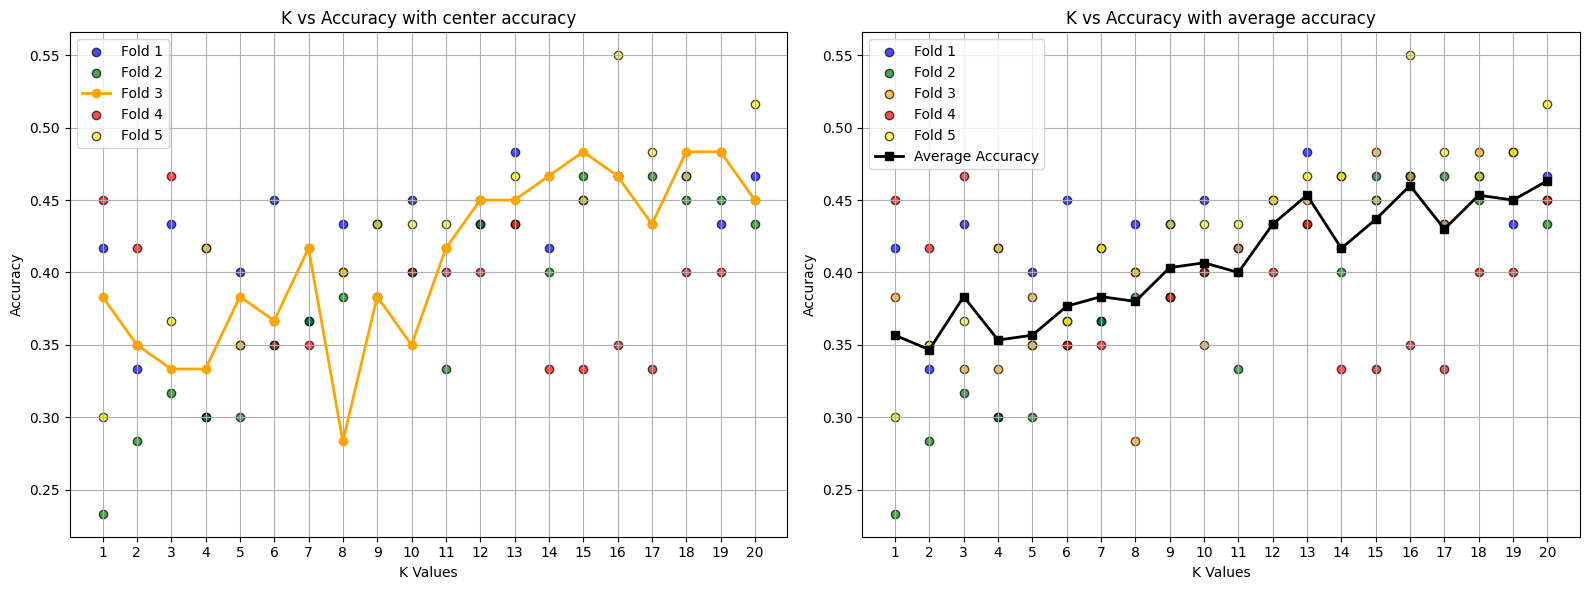

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Compute average accuracy and center accuracy
average_accuracies = {k: sum(accs) / len(accs) for k, accs in fold_accuracies.items()}

k_values = list(average_accuracies.keys())
num_folds = len(next(iter(fold_accuracies.values())))

# Colors for each fold
colors = ['blue', 'green', 'orange', 'red', 'yellow']

plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
for fold_idx in range(num_folds):
    fold_y = [fold_accuracies[k][fold_idx] for k in k_values]
    if fold_idx == 2:
        # Connect only fold 3 with line and dots for center accuracy
        plt.plot(k_values, fold_y, color=colors[fold_idx], marker='o', linewidth=2, label=f'Fold {fold_idx+1}')
    else:

        plt.scatter(k_values, fold_y, color=colors[fold_idx], edgecolor='black', alpha=0.7, label=f'Fold {fold_idx+1}')

plt.title('K vs Accuracy with center accuracy')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(k_values)

plt.subplot(1, 2, 2)
for fold_idx in range(num_folds):
    fold_y = [fold_accuracies[k][fold_idx] for k in k_values]
    plt.scatter(k_values, fold_y, color=colors[fold_idx], edgecolor='black', alpha=0.7, label=f'Fold {fold_idx+1}')

# Black line = average accuracy
avg_y = [average_accuracies[k] for k in k_values]
plt.plot(k_values, avg_y, color='black', marker='s', linewidth=2, label='Average Accuracy')

plt.title('K vs Accuracy with average accuracy')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(k_values)

plt.tight_layout()
plt.show()